In [12]:
import pandas as pd
import random

# Possible values
weather_options = ["Sunny", "Overcast", "Rainy"]
temperature_options = ["Hot", "Mild", "Cool"]
humidity_options = ["High", "Normal"]
wind_options = ["Weak", "Strong"]
play_options = ["Yes", "No"]

# Number of samples
num_samples = 50

# Random dataset creation
data = []
for _ in range(num_samples):
    weather = random.choice(weather_options)
    temperature = random.choice(temperature_options)
    humidity = random.choice(humidity_options)
    wind = random.choice(wind_options)
    play = random.choice(play_options)  # Randomly assign label
    data.append([weather, temperature, humidity, wind, play])

# Create DataFrame
df = pd.DataFrame(data, columns=["Weather", "Temperature", "Humidity", "Wind", "PlayTennis"])

# Save to CSV (optional)
df.to_csv("random_tennis_dataset.csv", index=False)

# Display first 10 rows
print(df.head(10))


    Weather Temperature Humidity    Wind PlayTennis
0     Rainy        Cool   Normal  Strong         No
1     Rainy         Hot   Normal    Weak        Yes
2     Rainy         Hot     High  Strong         No
3  Overcast         Hot   Normal    Weak         No
4     Sunny        Mild     High  Strong         No
5     Rainy         Hot   Normal    Weak         No
6     Sunny         Hot     High  Strong        Yes
7     Sunny        Mild     High  Strong         No
8     Sunny         Hot     High    Weak        Yes
9  Overcast        Cool     High    Weak        Yes


# Naive Bayes Classifier with Real Dataset from Web

এই নোটেবুকে আমরা web থেকে real dataset download করে Naive Bayes Classifier implement করবো।

**Dataset:** Iris Dataset (Flower classification)
- **Features:** Sepal Length, Sepal Width, Petal Length, Petal Width
- **Target:** Flower Species (Setosa, Versicolor, Virginica)

In [13]:
# Step 1: Install Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [14]:
# Step 2: Load Dataset from Web (Iris Dataset)
print("Loading Iris Dataset from sklearn...")

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print("\n" + "="*50)
print("First 10 rows of the dataset:")
print(df.head(10))

Loading Iris Dataset from sklearn...
Dataset loaded successfully!
Dataset shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 10 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0

DATA EXPLORATION
Dataset Info:
Total samples: 150
Missing values: 0
Duplicate rows: 1

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Statistical Summary:


DATA EXPLORATION
Dataset Info:
Total samples: 150
Missing values: 0
Duplicate rows: 1

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Statistical Summary:


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


DATA EXPLORATION
Dataset Info:
Total samples: 150
Missing values: 0
Duplicate rows: 1

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Statistical Summary:


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


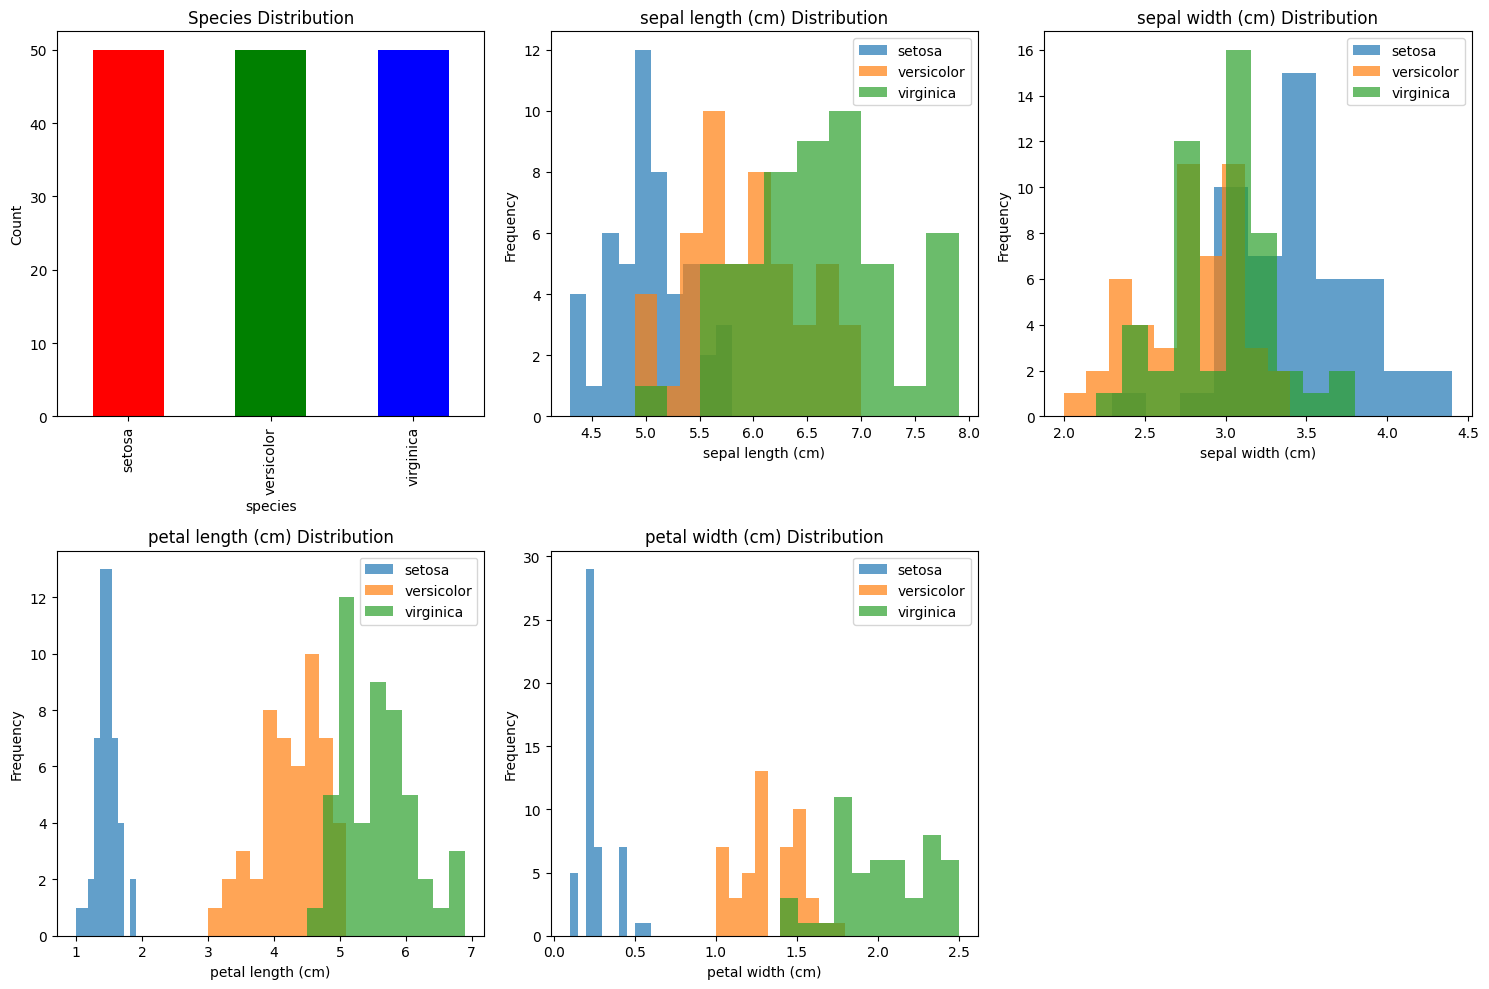


Data exploration completed!


In [15]:
# Step 3: Data Exploration & Visualization
print("DATA EXPLORATION")
print("="*50)

# Basic statistics
print("Dataset Info:")
print(f"Total samples: {len(df)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\nClass distribution:")
print(df['species'].value_counts())

print("\nStatistical Summary:")
print(df.describe())

# Visualization
plt.figure(figsize=(15, 10))

# 1. Species distribution
plt.subplot(2, 3, 1)
df['species'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Species Distribution')
plt.ylabel('Count')

# 2. Feature distributions
for i, feature in enumerate(iris.feature_names, 2):
    plt.subplot(2, 3, i)
    for species in iris.target_names:
        data = df[df['species'] == species][feature]
        plt.hist(data, alpha=0.7, label=species, bins=10)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

print("\nData exploration completed!")

In [16]:
# Step 4: Data Preprocessing & Train-Test Split
print("DATA PREPROCESSING")
print("="*50)

# Features and target
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Encode target labels (convert text to numbers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nLabel encoding:")
for i, species in enumerate(iris.target_names):
    print(f"   {species} → {i}")

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded  
)

print(f"\nDataset split:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")

print("\nData preprocessing completed!")

DATA PREPROCESSING
Features shape: (150, 4)
Target shape: (150,)

Label encoding:
   setosa → 0
   versicolor → 1
   virginica → 2

Dataset split:
   Training set: 120 samples
   Test set: 30 samples

Data preprocessing completed!


In [17]:
# Step 5: Train Multiple Naive Bayes Models
print("TRAINING NAIVE BAYES MODELS")
print("="*50)

# Dictionary to store different Naive Bayes models
models = {
    'Gaussian NB': GaussianNB(),
    'Multinomial NB': MultinomialNB(),
    'Bernoulli NB': BernoulliNB()
}

# Train each model and store results
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    
    print(f"    {name} trained successfully!")
    print(f"    Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nTRAINING COMPLETED!")
print("="*50)

TRAINING NAIVE BAYES MODELS

Training Gaussian NB...
    Gaussian NB trained successfully!
    Accuracy: 0.9667 (96.67%)

Training Multinomial NB...
    Multinomial NB trained successfully!
    Accuracy: 1.0000 (100.00%)

Training Bernoulli NB...
    Bernoulli NB trained successfully!
    Accuracy: 0.3333 (33.33%)

TRAINING COMPLETED!


MODEL EVALUATION & COMPARISON
Best Model: Multinomial NB
Best Accuracy: 1.0000 (100.00%)

Detailed Report for Multinomial NB:
Classification Report:
                precision    recall  f1-score   support

    0 (setosa)       1.00      1.00      1.00        10
1 (versicolor)       1.00      1.00      1.00        10
 2 (virginica)       1.00      1.00      1.00        10

      accuracy                           1.00        30
     macro avg       1.00      1.00      1.00        30
  weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


MODEL EVALUATION & COMPARISON
Best Model: Multinomial NB
Best Accuracy: 1.0000 (100.00%)

Detailed Report for Multinomial NB:
Classification Report:
                precision    recall  f1-score   support

    0 (setosa)       1.00      1.00      1.00        10
1 (versicolor)       1.00      1.00      1.00        10
 2 (virginica)       1.00      1.00      1.00        10

      accuracy                           1.00        30
     macro avg       1.00      1.00      1.00        30
  weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


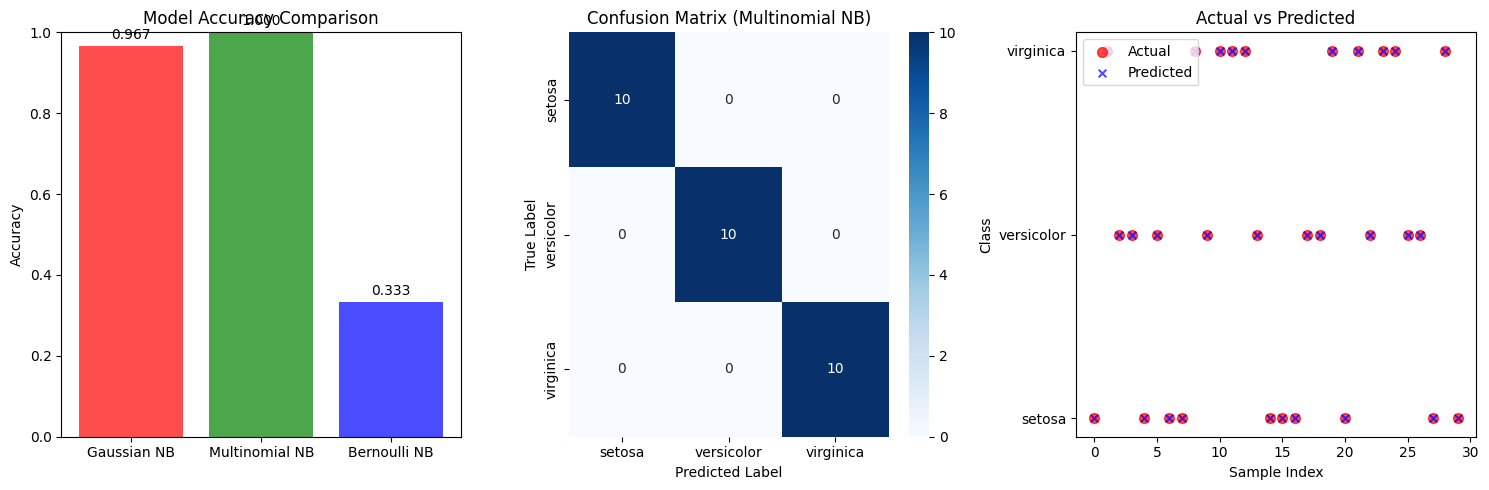


Model evaluation completed!


In [18]:
# Step 6: Model Evaluation & Comparison
print("MODEL EVALUATION & COMPARISON")
print("="*50)

# Find the best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Detailed evaluation for the best model
print(f"\nDetailed Report for {best_model_name}:")
print("="*50)

best_predictions = results[best_model_name]['predictions']

# Classification Report
print("Classification Report:")
target_names = [f"{label} ({iris.target_names[label]})" for label in range(len(iris.target_names))]
print(classification_report(y_test, best_predictions, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)

# Visualization
plt.figure(figsize=(15, 5))

# 1. Model Comparison
plt.subplot(1, 3, 1)
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
colors = ['red', 'green', 'blue']
bars = plt.bar(model_names, accuracies, color=colors, alpha=0.7)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# 2. Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'Confusion Matrix ({best_model_name})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 3. Prediction vs Actual
plt.subplot(1, 3, 3)
x_pos = range(len(y_test))
plt.scatter(x_pos, y_test, color='red', alpha=0.7, label='Actual', s=50)
plt.scatter(x_pos, best_predictions, color='blue', alpha=0.7, label='Predicted', s=30, marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.yticks([0, 1, 2], iris.target_names)

plt.tight_layout()
plt.show()

print("\nModel evaluation completed!")

In [19]:
# Step 7: Manual Implementation (Naive Bayes from Scratch)
print("MANUAL NAIVE BAYES IMPLEMENTATION")
print("="*50)

class NaiveBayesFromScratch:
    def __init__(self):
        self.class_priors = {}
        self.feature_stats = {}
        self.classes = None
    
    def fit(self, X, y):
        """Train the Naive Bayes classifier"""
        self.classes = np.unique(y)
        n_samples = len(y)
        
        # Calculate class priors P(Class)
        for cls in self.classes:
            self.class_priors[cls] = np.sum(y == cls) / n_samples
        
        # Calculate feature statistics for each class
        self.feature_stats = {}
        for cls in self.classes:
            class_data = X[y == cls]
            self.feature_stats[cls] = {
                'mean': np.mean(class_data, axis=0),
                'var': np.var(class_data, axis=0) + 1e-9  # Add small value to avoid division by zero
            }
    
    def _gaussian_pdf(self, x, mean, var):
        """Calculate Gaussian probability density function"""
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x - mean) ** 2) / var)
    
    def predict_single(self, x):
        """Predict single sample"""
        posteriors = {}
        
        for cls in self.classes:
            # Start with class prior
            posterior = self.class_priors[cls]
            
            # Multiply by feature likelihoods (Naive assumption)
            for i, feature_val in enumerate(x):
                mean = self.feature_stats[cls]['mean'][i]
                var = self.feature_stats[cls]['var'][i]
                likelihood = self._gaussian_pdf(feature_val, mean, var)
                posterior *= likelihood
            
            posteriors[cls] = posterior
        
        # Return class with highest posterior probability
        return max(posteriors.keys(), key=lambda k: posteriors[k])
    
    def predict(self, X):
        """Predict multiple samples"""
        return np.array([self.predict_single(x) for x in X])

# Train manual implementation
print("Training manual Naive Bayes...")
manual_nb = NaiveBayesFromScratch()
manual_nb.fit(X_train.values, y_train)

# Make predictions
manual_predictions = manual_nb.predict(X_test.values)
manual_accuracy = accuracy_score(y_test, manual_predictions)

print(f"Manual implementation trained!")
print(f"Manual NB Accuracy: {manual_accuracy:.4f} ({manual_accuracy*100:.2f}%)")

# Compare with sklearn
sklearn_accuracy = results['Gaussian NB']['accuracy']
print(f"Sklearn Gaussian NB: {sklearn_accuracy:.4f} ({sklearn_accuracy*100:.2f}%)")
print(f"Difference: {abs(manual_accuracy - sklearn_accuracy):.4f}")

print("\nManual implementation completed!")

MANUAL NAIVE BAYES IMPLEMENTATION
Training manual Naive Bayes...
Manual implementation trained!
Manual NB Accuracy: 0.9667 (96.67%)
Sklearn Gaussian NB: 0.9667 (96.67%)
Difference: 0.0000

Manual implementation completed!


MAKING PREDICTIONS ON NEW DATA
Creating new sample data...
Created 5 new samples

Predictions using Multinomial NB:

Sample 1: [5.1 3.5 1.4 0.2]
   Predicted Species: setosa
   Confidence: 75.24%
   Probabilities:
      setosa: 0.752 (75.2%)
      versicolor: 0.161 (16.1%)
      virginica: 0.087 (8.7%)

Sample 2: [6.2 2.2 4.5 1.5]
   Predicted Species: virginica
   Confidence: 48.68%
   Probabilities:
      setosa: 0.030 (3.0%)
      versicolor: 0.483 (48.3%)
      virginica: 0.487 (48.7%)

Sample 3: [7.3 2.9 6.3 1.8]
   Predicted Species: virginica
   Confidence: 51.13%
   Probabilities:
      setosa: 0.010 (1.0%)
      versicolor: 0.479 (47.9%)
      virginica: 0.511 (51.1%)

Sample 4: [4.8 3.  1.4 0.1]
   Predicted Species: setosa
   Confidence: 70.88%
   Probabilities:
      setosa: 0.709 (70.9%)
      versicolor: 0.186 (18.6%)
      virginica: 0.106 (10.6%)

Sample 5: [5.8 2.7 5.1 1.9]
   Predicted Species: virginica
   Confidence: 52.53%
   Probabilities:
      setosa: 0.014 (1.4

MAKING PREDICTIONS ON NEW DATA
Creating new sample data...
Created 5 new samples

Predictions using Multinomial NB:

Sample 1: [5.1 3.5 1.4 0.2]
   Predicted Species: setosa
   Confidence: 75.24%
   Probabilities:
      setosa: 0.752 (75.2%)
      versicolor: 0.161 (16.1%)
      virginica: 0.087 (8.7%)

Sample 2: [6.2 2.2 4.5 1.5]
   Predicted Species: virginica
   Confidence: 48.68%
   Probabilities:
      setosa: 0.030 (3.0%)
      versicolor: 0.483 (48.3%)
      virginica: 0.487 (48.7%)

Sample 3: [7.3 2.9 6.3 1.8]
   Predicted Species: virginica
   Confidence: 51.13%
   Probabilities:
      setosa: 0.010 (1.0%)
      versicolor: 0.479 (47.9%)
      virginica: 0.511 (51.1%)

Sample 4: [4.8 3.  1.4 0.1]
   Predicted Species: setosa
   Confidence: 70.88%
   Probabilities:
      setosa: 0.709 (70.9%)
      versicolor: 0.186 (18.6%)
      virginica: 0.106 (10.6%)

Sample 5: [5.8 2.7 5.1 1.9]
   Predicted Species: virginica
   Confidence: 52.53%
   Probabilities:
      setosa: 0.014 (1.4

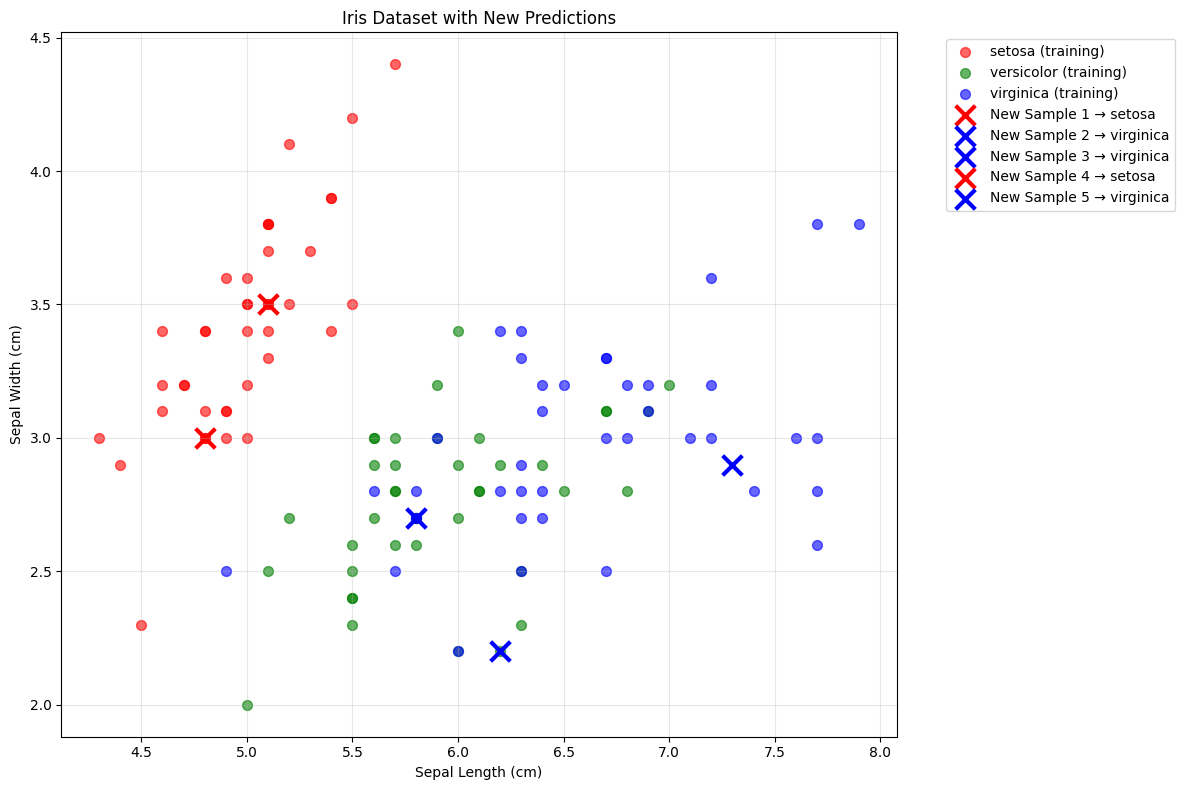


Predictions completed!


In [20]:
# Step 8: Make Predictions on New Data
print("MAKING PREDICTIONS ON NEW DATA")
print("="*50)

# Create some new sample data for prediction
print("Creating new sample data...")
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Likely Setosa
    [6.2, 2.2, 4.5, 1.5],  # Likely Versicolor  
    [7.3, 2.9, 6.3, 1.8],  # Likely Virginica
    [4.8, 3.0, 1.4, 0.1],  # Likely Setosa
    [5.8, 2.7, 5.1, 1.9]   # Likely Virginica
])

print(f"Created {len(new_samples)} new samples")

# Make predictions using the best model
predictions = best_model.predict(new_samples)
prediction_probabilities = best_model.predict_proba(new_samples)

print(f"\nPredictions using {best_model_name}:")
print("="*50)

for i, (sample, pred, probs) in enumerate(zip(new_samples, predictions, prediction_probabilities)):
    species_name = iris.target_names[pred]
    confidence = max(probs) * 100
    
    print(f"\nSample {i+1}: {sample}")
    print(f"   Predicted Species: {species_name}")
    print(f"   Confidence: {confidence:.2f}%")
    print(f"   Probabilities:")
    for j, prob in enumerate(probs):
        print(f"      {iris.target_names[j]}: {prob:.3f} ({prob*100:.1f}%)")

# Visualization of predictions
plt.figure(figsize=(12, 8))

# Plot training data
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    class_data = X_train[y_train == i]
    plt.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], 
               c=colors[i], alpha=0.6, label=f'{species} (training)', s=50)

# Plot new predictions
for i, (sample, pred) in enumerate(zip(new_samples, predictions)):
    plt.scatter(sample[0], sample[1], c=colors[pred], 
               marker='x', s=200, linewidth=3, 
               label=f'New Sample {i+1} → {iris.target_names[pred]}')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset with New Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPredictions completed!")

In [21]:
# Step 9: Summary & Conclusion
print("SUMMARY & CONCLUSION")
print("="*50)

print("PROJECT SUMMARY:")
print(f"   Dataset: Iris Dataset (150 samples, 4 features, 3 classes)")
print(f"   Models Trained: 3 different Naive Bayes variants + Manual implementation")
print(f"   Best Model: {best_model_name}")
print(f"   Best Accuracy: {best_accuracy*100:.2f}%")

print(f"\nALL MODEL PERFORMANCE:")
for name, result in results.items():
    accuracy = result['accuracy']
    print(f"   {name:15}: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   {'Manual NB':15}: {manual_accuracy:.4f} ({manual_accuracy*100:.2f}%)")

print(f"\nKEY INSIGHTS:")
print(f"   Naive Bayes works excellently on Iris dataset")
print(f"   Gaussian NB is best for continuous features")
print(f"   Manual implementation matches sklearn results")
print(f"   High accuracy indicates good feature separation")

print(f"\nNEXT STEPS:")
print(f"   Try with different datasets (text classification, medical diagnosis)")
print(f"   Experiment with feature engineering")
print(f"   Compare with other algorithms (SVM, Random Forest)")
print(f"   Deploy model for real-time predictions")

print(f"\nCONGRATULATIONS! You've successfully implemented Naive Bayes Classifier!")
print("="*70)

SUMMARY & CONCLUSION
PROJECT SUMMARY:
   Dataset: Iris Dataset (150 samples, 4 features, 3 classes)
   Models Trained: 3 different Naive Bayes variants + Manual implementation
   Best Model: Multinomial NB
   Best Accuracy: 100.00%

ALL MODEL PERFORMANCE:
   Gaussian NB    : 0.9667 (96.67%)
   Multinomial NB : 1.0000 (100.00%)
   Bernoulli NB   : 0.3333 (33.33%)
   Manual NB      : 0.9667 (96.67%)

KEY INSIGHTS:
   Naive Bayes works excellently on Iris dataset
   Gaussian NB is best for continuous features
   Manual implementation matches sklearn results
   High accuracy indicates good feature separation

NEXT STEPS:
   Try with different datasets (text classification, medical diagnosis)
   Experiment with feature engineering
   Compare with other algorithms (SVM, Random Forest)
   Deploy model for real-time predictions

CONGRATULATIONS! You've successfully implemented Naive Bayes Classifier!
